In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import json
import random
import re
import os

from pyannote.audio.pipelines import VoiceActivityDetection

import analysis_utils as aute

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [2]:
config_json = open("../LableniBotConfig/config.json")
config_dict = json.load(config_json)

hugging_face_key = config_dict["HUGGING_FACE"]

silence_detection_pipeline = VoiceActivityDetection(segmentation="pyannote/segmentation",
                                                    use_auth_token=hugging_face_key)

In [12]:
all_files_conv_list = []

path_conv = "../Conversations/"
for conv_id in os.listdir(path_conv):
    if "User" in conv_id:
        path_to_csv = path_conv + conv_id + "/"
        for sub_conv_id in os.listdir(path_to_csv):
            if "User" in sub_conv_id:
                all_files_conv_list.append(path_to_csv + sub_conv_id + "/")

In [15]:
time_diff_list = []

for whole_path in all_files_conv_list:
    try:
        name_csv_file = [f for f in os.listdir(whole_path) if ".csv" in f][0]
        data = pd.read_csv(whole_path + name_csv_file, sep=";")

        p_start = data["PersonTalkStartUnix"].dropna().values
        b_end = data["BotTalkEndUnix"].dropna().values

        max_shape = np.min([p_start.shape[0], b_end.shape[0]])

        time_diff  = p_start[:max_shape] - b_end[:max_shape]

        for t in time_diff:
            if not np.isnan(t):
                time_diff_list.append(t)
    except:
        print("Bad file", whole_path)

Bad file ../Conversations/User_50_CB_Conversations/User_50_CB_20221219_144734/


In [16]:
data

,ConversationSentenceId,SubjectId,ChatbotName,TimeLoopInitStr,UnixTimestampLoopInit,TimeSaveStr,UnixTimeSave,Source,SpanishMessage,Mode,...,BotStartUnix,BotEndUnix,AWSStartUniX,AWSEndUniX,S2TStartUnix,S2TEndUnix,BotTalkStartUnix,BotTalkEndUnix,PersonTalkStartUnix,PersonTalkEndUnix
0,0,User_52_CB,Lucía,2022-12-21 10:37:54.13071,1.671615e+09,2022-12-21 10:38:01.186518,1.671615e+09,Bot,"Hola, mi nombre es Lucía ¿Cual es tu nombre?",voice,...,1.671615e+09,1.671615e+09,1.671615e+09,1.671615e+09,NaN,NaN,1.671615e+09,1.671615e+09,NaN,NaN
1,0,User_52_CB,Lucía,NaN,NaN,2022-12-21 10:38:08.895179,1.671615e+09,Person,mi nombre es Hector,voice,...,NaN,NaN,NaN,NaN,1.671615e+09,1.671615e+09,NaN,NaN,1.671615e+09,1.671615e+09
2,1,User_52_CB,Lucía,2022-12-21 10:38:08.897173,1.671615e+09,2022-12-21 10:38:17.806650,1.671615e+09,Bot,"Encantada de conocerte, Hector. ¿De dónde eres?",voice,...,1.671615e+09,1.671615e+09,1.671615e+09,1.671615e+09,NaN,NaN,1.671615e+09,1.671615e+09,NaN,NaN
3,1,User_52_CB,Lucía,NaN,NaN,2022-12-21 10:38:29.8272,1.671616e+09,Person,soy de Torrent un pueblo cerca de Valencia lo...,voice,...,NaN,NaN,NaN,NaN,1.671616e+09,1.671616e+09,NaN,NaN,1.671615e+09,1.671616e+09
4,2,User_52_CB,Lucía,2022-12-21 10:38:29.10267,1.671616e+09,2022-12-21 10:38:36.400768,1.671616e+09,Bot,"no, no lo conozco. ¿Cómo es Torrent?",voice,...,1.671616e+09,1.671616e+09,1.671616e+09,1.671616e+09,NaN,NaN,1.671616e+09,1.671616e+09,NaN,NaN
5,2,User_52_CB,Lucía,NaN,NaN,2022-12-21 10:38:58.538655,1.671616e+09,Person,Torrent es un pueblo que te recomiendo tiene b...,voice,...,NaN,NaN,NaN,NaN,1.671616e+09,1.671616e+09,NaN,NaN,1.671616e+09,1.671616e+09
6,3,User_52_CB,Lucía,2022-12-21 10:38:58.540652,1.671616e+09,2022-12-21 10:39:08.301937,1.671616e+09,Bot,"suena genial, me gustaría visitarlo algún día...",voice,...,1.671616e+09,1.671616e+09,1.671616e+09,1.671616e+09,NaN,NaN,1.671616e+09,1.671616e+09,NaN,NaN
7,3,User_52_CB,Lucía,NaN,NaN,2022-12-21 10:39:23.196173,1.671616e+09,Person,En mi tiempo libre me gusta venir a la playa y...,voice,...,NaN,NaN,NaN,NaN,1.671616e+09,1.671616e+09,NaN,NaN,1.671616e+09,1.671616e+09
8,4,User_52_CB,Lucía,2022-12-21 10:39:23.198168,1.671616e+09,2022-12-21 10:39:30.311394,1.671616e+09,Bot,Suena muy divertido. ¿A qué te dedicas?,voice,...,1.671616e+09,1.671616e+09,1.671616e+09,1.671616e+09,NaN,NaN,1.671616e+09,1.671616e+09,NaN,NaN
9,4,User_52_CB,Lucía,NaN,NaN,2022-12-21 10:39:41.475080,1.671616e+09,Person,Me dedico al diseño de páginas web.,voice,...,NaN,NaN,NaN,NaN,1.671616e+09,1.671616e+09,NaN,NaN,1.671616e+09,1.671616e+09


Mean Elapsed time between Bot ends and person starts = 0.0021 +/- 0.0004 ; Median = 0.002 ; Min. =  0.0009 ; Max. =  0.007


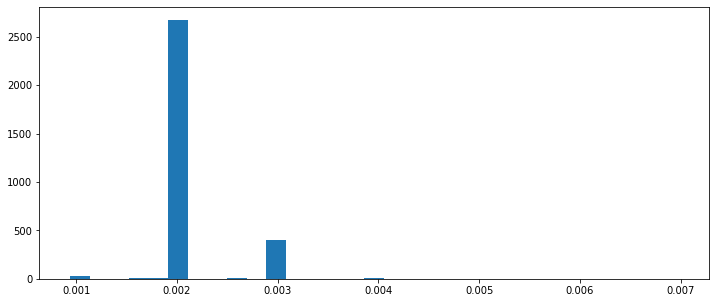

In [17]:
aute.stat_print(time_diff_list, "Elapsed time between Bot ends and person starts")

plt.figure(figsize=(12, 5))
plt.hist(time_diff_list, bins=31)

plt.show()

In [19]:
save_data_list = []

for i_wp, whole_path in enumerate(all_files_conv_list):
    
    print("Iteration", i_wp, end="\r")
    try:
        name_csv_file = [f for f in os.listdir(whole_path) if ".csv" in f][0]
        data = pd.read_csv(whole_path + name_csv_file, sep=";")

        path_to_audios = whole_path + "Audios/"
        all_audios = os.listdir(path_to_audios)
        for i_audio, audio in enumerate(all_audios):
            try:
                vad = silence_detection_pipeline(path_to_audios + audio)
            except:
                continue

            x = vad.get_timeline().segments_set_
            start_person_talk_since_audio = list(x)[0].start if len(x) > 0 else 0

            conv_position = int(audio.split(".")[0][-1])

            bot_end_talk = data["BotTalkEndUnix"].iloc[2*conv_position]

            if 2*conv_position+1 < data.shape[0]:

                person_start_talk = data["PersonTalkStartUnix"].iloc[2*conv_position+1]

                diff_listen_talk = person_start_talk + start_person_talk_since_audio - bot_end_talk

                config_name_bot = data["ConfigName"].iloc[0]
                bot_personality, bot_gender, bot_type_id = config_name_bot.split("_")

                bot_gender = "Female" if bot_gender=="Woman" else bot_gender
                bot_gender = "Male" if bot_gender=="Man" else bot_gender

                save_data_list.append({
                    "PathId": i_wp,
                    "ConvStartTime": data["UnixTimestampLoopInit"].iloc[0],
                    "SubjectId": data["SubjectId"].iloc[0],
                    "ConvStepId": i_audio,
                    "DiffTimeListenTalk": diff_listen_talk,
                    "AudioDetection": start_person_talk_since_audio,
                    "BotPersonality": bot_personality,
                    "BotGender": bot_gender,
                    "BotTypeId": bot_type_id
                })
    except:
        print("Bad file", whole_path)
            
df_res = pd.DataFrame(save_data_list)

Bad file ../Conversations/User_50_CB_Conversations/User_50_CB_20221219_144734/


Mean Time thinking = 1.4992 +/- 2.1635 ; Median = 0.9386 ; Min. =  0.0019 ; Max. =  27.4154


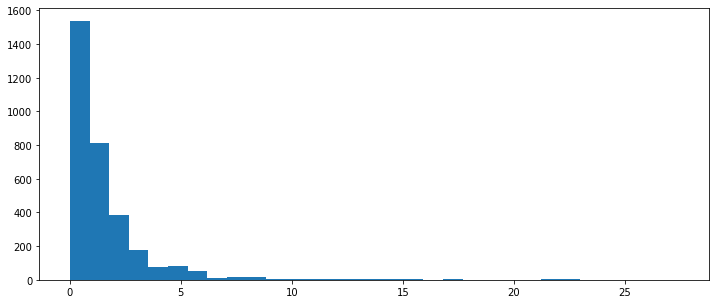

In [20]:
aute.stat_print(df_res["DiffTimeListenTalk"], "Time thinking")

plt.figure(figsize=(12, 5))
plt.hist(df_res["DiffTimeListenTalk"], bins=31)

plt.show()

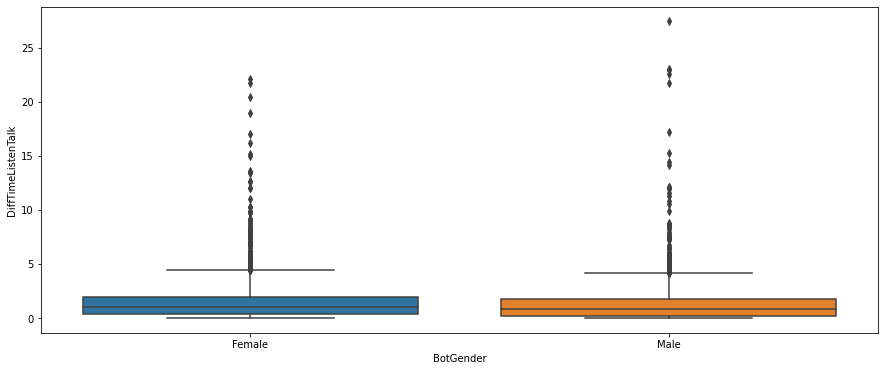

In [21]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_res, x="BotGender", y="DiffTimeListenTalk")
plt.show()

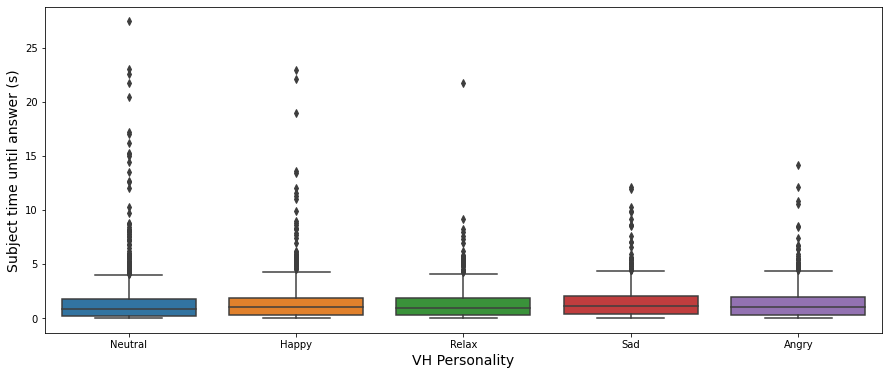

Mean Personality Angry = 1.4697 +/- 1.774 ; Median = 0.9892 ; Min. =  0.002 ; Max. =  14.1011
Mean Personality Happy = 1.6486 +/- 2.4435 ; Median = 0.9724 ; Min. =  0.002 ; Max. =  22.9604
Mean Personality Neutral = 1.4771 +/- 2.4487 ; Median = 0.8373 ; Min. =  0.002 ; Max. =  27.4154
Mean Personality Relax = 1.3603 +/- 1.683 ; Median = 0.9048 ; Min. =  0.0019 ; Max. =  21.7117
Mean Personality Sad = 1.571 +/- 1.8279 ; Median = 1.0736 ; Min. =  0.002 ; Max. =  12.0761


In [22]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_res, x="BotPersonality", y="DiffTimeListenTalk")
plt.ylabel("Subject time until answer (s)", fontsize=14)
plt.xlabel("VH Personality", fontsize=14)

plt.savefig("Results/Images/TimeThinking.pdf", dpi=300, format="pdf")

plt.show()

for k, df_k in df_res.groupby("BotPersonality"):
    aute.stat_print(df_k["DiffTimeListenTalk"], "Personality " + k)